In [337]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
from BS_utils import *
from yh_utils import *
from utils import *

In [265]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [281]:
df=option_parser('^SPX')
call=df[df.optionType=='call'].copy()
call.drop(columns=['contractSize','currency','optionType','openInterest','change','percentChange'],inplace=True)

In [282]:
calls_lw=(call[call.apply(lambda x: (x['lastTradeDate']).date()>dt.datetime.now().date()-dt.timedelta(weeks=1), axis=1)]).copy()
#calls_today=(call[call.apply(lambda x: (x['lastTradeDate']).date()==dt.datetime.now().date(), axis=1)]).copy()
Stocks=yf.Ticker('^SPX').history(period='8d',interval='1m')[['Open','High','Low','Close']].mean(axis=1)
calls_lw['StockPrice']=calls_lw.apply(lambda x:add_stocks(x,Stocks),axis=1)
calls_lw.dropna(axis=0,subset='StockPrice',inplace=True)
calls_lw['BSvol']=calls_lw.apply(lambda x: imp_vol_BS(S=x['StockPrice'],P=x['lastPrice'],K=x['strike'],T=x['daysToExpiration']/252,q=0.0127),axis=1)
#calls_lw['ImpS']=calls_lw.apply(lambda x: imp_S_BS(vol=x['impliedVolatility'],P=x['lastPrice'],K=x['strike'],T=x['daysToExpiration']/252,q=0.0127),axis=1)
calls_lw['dvol/ds']=calls_lw.apply(lambda x: dvolds(S=x['StockPrice'],K=x['strike'],T=x['daysToExpiration']/252,q=0.0127,vol=x['BSvol']),axis=1)
calls_lw['manual_dvds']=calls_lw.apply(lambda x: manual_d(P=x['lastPrice'],S=x['StockPrice'],K=x['strike'],T=x['daysToExpiration']/252,q=0.0127,ds=4),axis=1)

e:\Projects\Heston\BS_util.py:31: RuntimeWarning: overflow encountered in exp
  step=np.sign(C-P)*np.exp(np.log(np.abs(C-P))-log_BS_Vega(S=S,K=K,r=0.04,vol=vol0,T=T,q=q))
e:\Projects\Heston\BS_util.py:83: RuntimeWarning: overflow encountered in exp
  else:
e:\Projects\Heston\BS_util.py:22: RuntimeWarning: invalid value encountered in log
  vol0=np.sqrt(2*np.abs(np.log(money))/T)
e:\Projects\Heston\BS_util.py:5: RuntimeWarning: invalid value encountered in log
  dp=1/vol/np.sqrt(T)*(np.log(S/K)+(r-q+vol**2/2)*T)
e:\Projects\Heston\BS_util.py:15: RuntimeWarning: invalid value encountered in log
  dp=1/vol/np.sqrt(T)*(np.log(S/K)+(r+vol**2/2)*T)
e:\Projects\Heston\BS_util.py:16: RuntimeWarning: invalid value encountered in log
  return np.log(S)-(dp)**2/2-0.5*np.log(np.pi*2/T)-q*T
e:\Projects\Heston\BS_util.py:31: RuntimeWarning: overflow encountered in exp
  step=np.sign(C-P)*np.exp(np.log(np.abs(C-P))-log_BS_Vega(S=S,K=K,r=0.04,vol=vol0,T=T,q=q))


In [273]:
calls_lw.sort_values(axis=0,by='BSvol',ascending=True)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,volume,impliedVolatility,inTheMoney,expiration,daysToExpiration,StockPrice,BSvol,ImpS,dvol/ds,manual_dvds
0,SPXW250422C04400000,2025-04-22 13:36:01+00:00,4400.0,811.93,861.2,879.3,1.0,1.914063,True,2025-04-22 23:59:59,0.433333,5211.832397,1.000000e-07,5209.394275,-inf,NaN
50,SPXW250422C05110000,2025-04-22 14:23:34+00:00,5110.0,138.90,156.4,162.1,42.0,0.502385,True,2025-04-22 23:59:59,0.400694,5248.712646,1.000000e-07,5243.811127,-inf,NaN
46,SPXW250422C05085000,2025-04-22 15:14:35+00:00,5085.0,186.14,185.8,186.5,128.0,0.541753,True,2025-04-22 23:59:59,0.365278,5271.827637,1.000000e-07,5269.037952,-inf,NaN
41,SPXW250422C05060000,2025-04-22 13:49:27+00:00,5060.0,171.20,209.7,210.4,331.0,0.573613,True,2025-04-22 23:59:59,0.424306,5235.607544,1.000000e-07,5226.205684,-inf,NaN
22,SPXW250430C04570000,2025-04-17 19:28:44+00:00,4570.0,693.83,703.9,710.8,4.0,0.602574,True,2025-04-30 23:59:59,9.188889,5291.692627,1.000000e-07,5224.844888,-inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,SPXW250516C01200000,2025-04-17 14:20:12+00:00,1200.0,4082.47,4059.1,4079.5,37.0,2.461308,True,2025-05-16 23:59:59,21.402778,5281.484863,1.910243e+00,5270.976580,-0.125344,-0.477561
0,SPX251219C00200000,2025-04-17 16:55:21+00:00,200.0,5084.00,5028.3,5046.4,1.0,0.000010,True,2025-12-19 23:59:59,176.295139,5314.889893,1.924961e+00,5324.219757,-0.033986,-0.039135
0,SPX260417C00200000,2025-04-22 14:32:41+00:00,200.0,5020.00,5011.2,5050.3,2.0,0.000010,True,2026-04-17 23:59:59,258.394444,5244.567505,2.055153e+00,5278.294378,-0.015122,-0.015217
1,SPXW250425C02400000,2025-04-21 19:29:08+00:00,2400.0,2720.69,2865.6,2883.9,2.0,3.737794,True,2025-04-25 23:59:59,4.188194,5118.875000,2.148076e+00,5077.396619,-0.237547,-0.537019


In [ ]:
imp_vol_BS(811.93,5211.832397,4400,0.05,0.433333/252,q=0.0127)

In [303]:
BS(5209.394275,4400,0.05,1.914063,0.433333/252,0.0127)

(np.float64(811.9299946003566), np.float64(2.271193950612542))

Notes: High dvol/ds means the implied volatility is very sensitive to errors in the underlying Stock (asset) price, since the stock prices are obtained from averages in a 1 min snapshot the price may not be accurate here.

Volatility Surface

In [324]:
vols=calls_lw[['strike','daysToExpiration','BSvol']]

Text(0.5, 0, 'ImpVol')

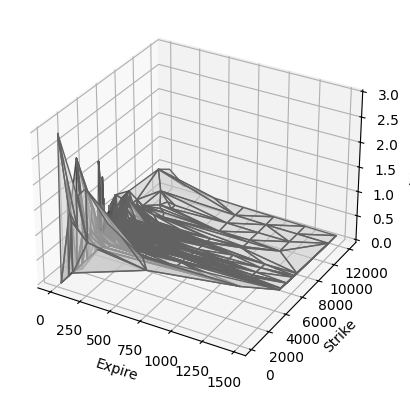

In [325]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(vols.daysToExpiration,vols.strike, vols.BSvol, color='white', edgecolors='grey', alpha=0.5)
ax.set_xlabel('Expire')                         # axis label
ax.set_ylabel('Strike')
ax.set_zlabel('ImpVol')

In [383]:
xs,ys=np.meshgrid(np.linspace(0,1500,10),np.linspace(0,15000,10))
xs=xs/1500
ys=ys/15000
clm=CL(nodes=np.stack((xs.flatten(),ys.flatten())).T)
x=np.stack((vols.daysToExpiration.to_numpy()/1500,vols.strike.to_numpy()/15000)).T.copy()
clm.train_sched(x,n=100000)
clm.agg(x,vols.BSvol.to_numpy())


Text(0.5, 0, 'ImpVol')

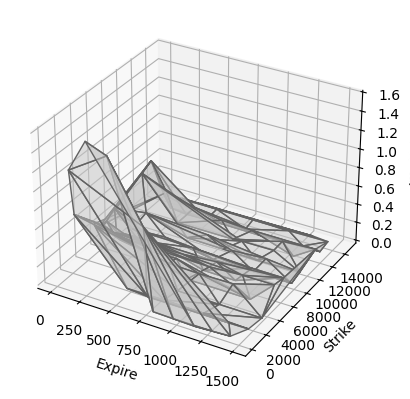

In [384]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(clm.nodes[:,0]*1500,clm.nodes[:,1]*15000, clm.val, color='white', edgecolors='grey', alpha=0.5)
ax.set_xlabel('Expire')                         # axis label
ax.set_ylabel('Strike')
ax.set_zlabel('ImpVol')

Testing

In [370]:
xs,ys=np.meshgrid(np.linspace(0,1400,10),np.linspace(0,12000,10))

In [374]:
np.stack((xs.flatten(),ys.flatten())).T

(2, 100)

In [379]:
xs,ys=np.meshgrid(np.linspace(0,1400,10),np.linspace(0,12000,10))
clm=CL(nodes=np.stack((xs.flatten(),ys.flatten())).T)
x=np.stack((vols.daysToExpiration.to_numpy(),vols.strike.to_numpy())).T.copy()
clm.train_sched(x,n=100000)
clm.agg(x,vols.BSvol.to_numpy())


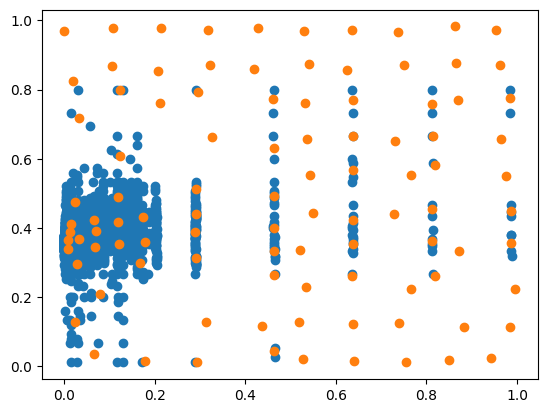

In [385]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(clm.nodes[:,0],clm.nodes[:,1])

In [368]:
clm.nodes

array([[9.53158008e-01, 5.93160377e-02],
       [9.11755240e-01, 1.20897543e-01],
       [4.43570294e-01, 3.76330258e-01],
       [6.43032933e-01, 6.56151798e-01],
       [8.80066078e-01, 2.94151145e-01],
       [2.99127131e-01, 9.41105622e-01],
       [3.82836091e-01, 3.50070426e-01],
       [3.31279212e-01, 4.62443304e-01],
       [5.14416787e-02, 7.82505965e-01],
       [3.96640189e-02, 5.23824792e-01],
       [8.60017891e-01, 2.51609962e-02],
       [4.59018033e-01, 4.77004754e-01],
       [3.60810560e-01, 4.95672803e-01],
       [2.06534427e-01, 6.70386634e-01],
       [6.97106159e-01, 2.64626695e-01],
       [2.10230470e-01, 9.45243773e-01],
       [5.86374803e-01, 1.27187809e-01],
       [2.34225862e-01, 4.18782032e-01],
       [8.41176441e-01, 7.38023812e-01],
       [9.07737967e-01, 2.70052797e-01],
       [9.81676881e-01, 1.15309731e-01],
       [1.83401878e+02, 7.17813244e+03],
       [7.23820892e-01, 7.24026904e-01],
       [6.50515759e-01, 8.62731796e-01],
       [7.389874